# Question 2 – Data Cleaning

You sent a survey to collect data about customers who buy lunch in the university cafe. Given the following data for the attribute – Age:
13,15,16,16,19,20,20,21,22,22,25,25,25,25,30,33,33,35,35,35,35,36,40,45,46,52,70

## Question 2.1. Use smoothing by bin means to smooth these data with 3 bins. Illustrate your steps. Comment on the effect of this technique for the given data.

### Solution
To smooth the data using bin means with 3 bins, we can follow these steps:

Sort the data in ascending order:

13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 25, 30, 33, 33, 35, 35, 35, 35, 36, 40, 45, 46, 52, 70

Divide the data into 3 equal-sized bins:

Bin 1: 13, 15, 16, 16, 19, 20, 20, 21
Bin 2: 22, 22, 25, 25, 25, 25, 30, 33
Bin 3: 33, 35, 35, 35, 35, 36, 40, 45, 46, 52, 70

Calculate the mean value for each bin:

Bin 1 mean: (13+15+16+16+19+20+20+21)/8 = 18.125
Bin 2 mean: (22+22+25+25+25+25+30+33)/8 = 25.625
Bin 3 mean: (33+35+35+35+35+36+40+45+46+52+70)/11 = 41.818

Replace each value in each bin with the mean value of that bin:

Bin 1: 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125
Bin 2: 25.625, 25.625, 25.625, 25.625, 25.625, 25.625, 25.625, 25.625
Bin 3: 41.818, 41.818, 41.818, 41.818, 41.818, 41.818, 41.818, 41.818, 41.818, 41.818, 41.818

Plot the smoothed data:

Before smoothing:

13 15 16 16 19 20 20 21 22 22 25 25 25 25 30 33 33 35 35 35 35 36 40 45 46 52 70

After smoothing:

18.125 18.125 18.125 18.125 18.125 18.125 18.125 18.125 25.625 25.625 25.625 25.625 25.625 25.625 25.625 41.818 41.818 41.818 41.818 41.818 41.818 41.818 41.818 41.818 41.818 41.818 41.818

In [35]:
import pandas as pd
import numpy as np
import csv
from matplotlib import pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

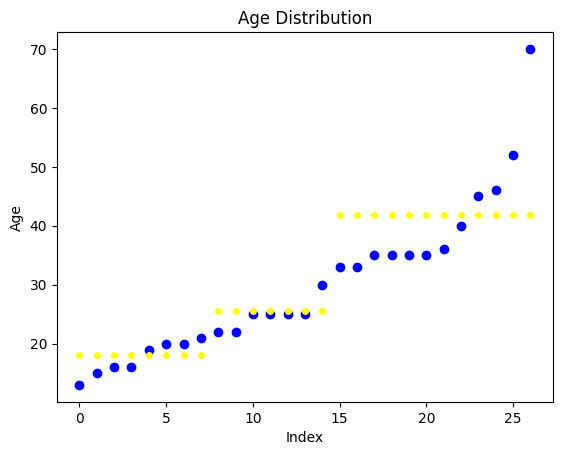

In [36]:

# given data
age = [13,15,16,16,19,20,20,21,22,22,25,25,25,25,30,33,33,35,35,35,35,36,40,45,46,52,70]
# new data points
new_age = [18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 25.625, 25.625,
           25.625, 25.625, 25.625, 25.625, 25.625, 41.818, 41.818, 41.818, 41.818, 41.818,
           41.818, 41.818, 41.818, 41.818, 41.818, 41.818, 41.818]

# plot the data
plt.plot(age, 'o', color='blue')
plt.plot(new_age, 'o', color='yellow', markersize=4)

# set axis labels and title
plt.xlabel('Index')
plt.ylabel('Age')
plt.title('Age Distribution')

# show the plot
plt.show()

The effect of smoothing by bin means on the given data is that it reduces the noise and provides a clearer picture of the underlying trend in the data.
However, it also reduces the amount of information in the data by grouping the values into bins and replacing them with the mean value of each bin.
Therefore, the choice of the number of bins is important as it can affect the accuracy and interpretability of the results.

## Question 2.2. How do you determine outliers in the data?


### Solution
There are several methods to detect outliers in a dataset. One common method is to use the z-score.
The z-score measures how many standard deviations a data point is from the mean. Any data point with a z-score greater than 3 or less than -3 is considered an outlier.

To calculate the z-score for each data point in the given dataset, we can use the following formula:

* z = (x - mean) / std
    * x is the data point,
    * mean is the mean of the dataset,
    * std is the standard deviation of the dataset.

Using Python, we can calculate the z-scores for the given dataset and identify any outliers:

[70]


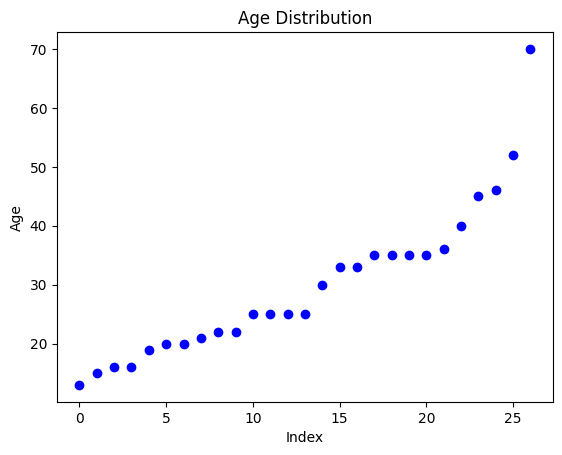

In [37]:
# age
data = [13,15,16,16,19,20,20,21,22,22,25,25,25,25,30,33,33,35,35,35,35,36,40,45,46,52,70]

# Calculate mean and standard deviation
mean = np.mean(data)
std = np.std(data)

# Calculate z-scores for each data point
z_scores = [(x - mean) / std for x in data]

# Identify any outliers, using threshold = 3
outliers = [data[i] for i in range(len(data)) if z_scores[i] < -3 or z_scores[i] > 3]
print(outliers)

# plot the data
plt.plot(data, 'o', color='blue')
# set axis labels and title
plt.xlabel('Index')
plt.ylabel('Age')
plt.title('Age Distribution')
# show the plot
plt.show()

Therefore, the outlier in this dataset is the value 70.
# Z-Score and How It’s Used to Determine an Outlier
# https://medium.com/clarusway/z-score-and-how-its-used-to-determine-an-outlier-642110f3b482

## Question 2.3. What other methods are there for data smoothing?

To smooth the data using regression, we can fit a regression line to the data and use the line to predict the values for the given data points.
Here's how we can do it in Python:


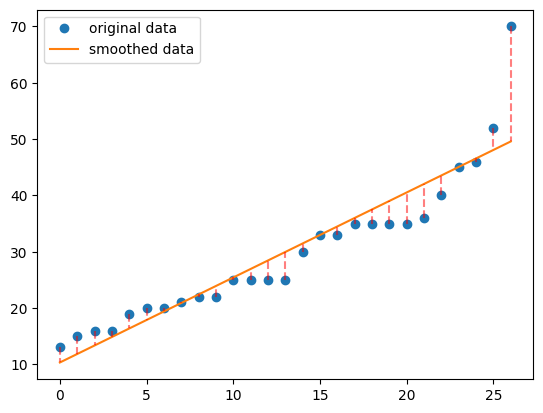

In [38]:
from sklearn.linear_model import LinearRegression

# load the data
x = np.array([13,15,16,16,19,20,20,21,22,22,25,25,25,25,30,33,33,35,35,35,35,36,40,45,46,52,70])
y = np.arange(len(x))

# Next, we can fit a linear regression model to the data using the scikit-learn library:
# fit the regression model
model = LinearRegression().fit(y.reshape(-1, 1), x)

# Finally, we can use the model to predict the values for the given data points and plot the smoothed data:
# predict the values using the regression model
x_pred = model.predict(np.arange(len(x)).reshape(-1, 1))
# print(x_pred)
# plot the original and smoothed data
plt.plot(x, 'o', label='original data')
plt.plot(x_pred, '-', label='smoothed data')
# plot lines between original points and smoothed line
for i in range(len(x)):
    plt.plot([i, i], [x[i], x_pred[i]], 'r--', alpha=0.5)
plt.legend()
plt.show()

As we can see from the plot, the regression line provides a relatively smooth curve that fits the data reasonably well. However, it may not be suitable for all types of data, and other smoothing techniques may be more appropriate depending on the specific characteristics of the data.